In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import math
import matplotlib.pyplot as plt
from numpy.random import randint
import seaborn as sns

# 各ファイルの確認

In [5]:
%cd C:\Users\Takeshi\OneDrive\Bitgrid\Dataset\Description Data

C:\Users\Takeshi\OneDrive\Bitgrid\Dataset\Description Data


In [6]:
train_desc_df = pd.read_csv("train_desc_df.csv")
train_desc_df.head()

,comp_id,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,desc_8,desc_9,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
0,1,-0.009555,0.002479,0.002927,0.015774,-0.008177,-0.016036,0.026697,-0.000106,0.025788,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
1,2,-0.009555,0.002479,0.002927,0.015774,-0.008177,-0.016036,0.026697,-0.000106,0.025788,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
2,3,-0.356706,0.213562,0.252663,0.090735,0.328961,-0.482705,0.067300,0.384217,-0.147253,...,-0.626436,-0.102908,0.576792,-0.805986,0.310637,0.422263,0.403496,0.264240,7.057590,-0.252417
3,4,-0.294013,0.165262,0.257102,0.421037,0.463214,-0.769155,0.159450,0.236385,-0.183974,...,-0.435836,0.052975,0.108777,-0.599593,0.408430,0.591615,0.415667,0.334706,7.025648,-0.309093
4,5,-0.028657,0.157017,0.282709,-2.674227,-0.711383,2.259387,-0.162175,0.605468,0.712229,...,-1.714496,0.297421,-0.097744,0.000669,-1.639307,0.244313,0.099975,0.371806,-2.259024,-0.131085


In [7]:
test_desc_df = pd.read_csv("public_desc_df.csv")
test_desc_df.head()

,comp_id,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,desc_8,desc_9,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
0,3001,-0.266289,0.151930,0.188684,0.935617,0.021999,0.100940,0.107302,-0.055652,0.023322,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
1,3002,-0.266289,0.151930,0.188684,0.935617,0.021999,0.100940,0.107302,-0.055652,0.023322,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
2,3003,-0.266289,0.151930,0.188684,0.935617,0.021999,0.100940,0.107302,-0.055652,0.023322,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
3,3004,-0.298706,-0.022012,0.552924,0.046070,0.044543,0.132187,-0.549770,1.437774,1.286943,...,0.246156,-1.001942,-1.502183,1.105716,-0.170937,0.181976,0.437707,0.058352,-2.209322,0.104916
4,3005,-0.266289,0.151930,0.188684,0.935617,0.021999,0.100940,0.107302,-0.055652,0.023322,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262


In [8]:
%cd C:\Users\Takeshi\OneDrive\Bitgrid\Dataset\Image Data

C:\Users\Takeshi\OneDrive\Bitgrid\Dataset\Image Data


In [9]:
train_image_df = pd.read_csv("train_image_df.csv")
train_image_df.head()

,comp_id,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,...,image_3991,image_3992,image_3993,image_3994,image_3995,image_3996,image_3997,image_3998,image_3999,image_4000
0,1,0.484456,0.036087,-0.149328,0.144475,-0.617386,0.035018,0.169174,-0.005733,-0.104908,...,-0.090408,-0.032915,-0.010857,-0.015954,0.123416,0.195833,-0.066449,0.115818,-0.005140,0.017278
1,2,0.074533,-0.015655,-0.016286,-0.480964,0.687917,0.037131,-0.149725,-0.002098,0.099383,...,-0.625816,-0.009616,0.004558,0.008310,-0.173496,0.133518,-0.488898,0.084832,0.146566,0.007997
2,3,-0.396809,0.021490,-1.723037,0.666147,-0.631924,0.047724,0.336041,-0.003904,0.039683,...,-0.078059,0.086320,-0.005606,0.002414,-0.164493,0.218473,0.151292,-0.076860,0.008321,0.012555
3,4,0.995316,0.012766,0.387472,-0.684791,-0.209261,0.013654,0.138517,0.005586,0.079277,...,-0.190714,-0.005452,-0.003889,0.013430,0.344406,0.038220,0.210446,-0.145128,-0.019172,0.000532
4,5,-0.611648,0.000860,-0.572393,0.894287,-0.191228,-0.111583,-0.011111,0.003231,-0.160582,...,-0.040437,-0.142134,-0.022771,-0.013134,-0.024869,0.125129,0.215967,0.005288,0.145715,0.001425


In [10]:
test_image_df = pd.read_csv("public_image_df.csv")
test_image_df.head()

,comp_id,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,...,image_3991,image_3992,image_3993,image_3994,image_3995,image_3996,image_3997,image_3998,image_3999,image_4000
0,3001,-0.288211,0.007964,-0.318695,-0.519448,-0.707238,0.018358,-0.127491,0.006911,-0.163305,...,0.095390,-0.005706,0.011662,0.027501,0.202042,0.031049,0.058993,0.085795,-0.033876,-0.010047
1,3002,-0.053049,-0.019362,-0.942308,0.971880,-0.145869,0.190100,0.323404,0.001693,0.052303,...,-0.152575,-0.015299,0.006474,0.008779,0.064745,-0.130691,0.519738,-0.009965,0.226757,0.001792
2,3003,0.527363,0.027754,-1.644639,-0.362191,-0.275900,0.095907,-0.083026,-0.002009,0.041976,...,-0.139857,0.056012,0.010546,-0.013047,0.395852,0.064757,0.061725,0.081311,0.094162,-0.015818
3,3004,0.709023,0.002011,-0.968376,0.478994,-0.451566,0.217366,-0.036373,0.004914,0.133615,...,-0.343643,0.072151,0.045109,-0.009794,-0.002994,0.142427,-0.001836,0.116891,0.078607,-0.000430
4,3005,-0.349026,-0.060301,-1.099632,1.475574,-0.076292,0.153835,-0.143689,0.006389,0.058670,...,0.158350,-0.024394,0.002807,-0.004787,-0.012235,0.022360,0.034833,0.084962,-0.092006,0.010375


In [11]:
%cd C:\Users\Takeshi\OneDrive\Bitgrid\Dataset\Metadata

C:\Users\Takeshi\OneDrive\Bitgrid\Dataset\Metadata


In [12]:
train_meta_df = pd.read_csv("train_meta_df.csv")
train_meta_df.head()

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,1,False,True,1.77778,86,3,True,False,0,290,3,0,5,6
1,2,False,True,1.33333,1129,2,True,False,0,1443,0,2,5,6
2,3,False,True,1.76667,1163,2,True,False,0,329,0,1,5,6
3,4,False,True,1.77778,1326,2,True,False,0,63,0,3,5,6
4,5,False,True,1.77273,2612,2,True,False,3,37,0,0,5,6


In [13]:
test_meta_df = pd.read_csv("public_meta_df.csv")
test_meta_df.head()

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,n_formats,dayofweek,hour
0,3001,False,True,1.33333,1675,2,False,False,0,10,2,2,3
1,3002,False,True,1.33333,1479,2,False,False,0,10,2,2,3
2,3003,False,True,1.33333,1505,2,False,False,0,10,2,2,3
3,3004,False,True,1.77778,50,2,True,True,1,6,5,2,3
4,3005,False,True,1.33333,1543,2,False,False,0,6,2,2,3


In [14]:
%cd C:\Users\Takeshi\OneDrive\Bitgrid\Dataset\Title Data

C:\Users\Takeshi\OneDrive\Bitgrid\Dataset\Title Data


In [15]:
train_title_df = pd.read_csv("train_title_df.csv")
train_title_df.head()

,comp_id,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,...,title_41,title_42,title_43,title_44,title_45,title_46,title_47,title_48,title_49,title_50
0,1,-0.977637,-0.543310,0.079403,0.205560,-1.497104,0.230466,0.566112,-0.662264,0.130342,...,0.059434,-0.272340,-0.030180,-0.109040,-0.033425,0.728739,0.142030,0.397541,1.270722,-0.816523
1,2,0.041873,0.644655,0.140869,-0.664714,-0.062992,0.240086,-1.017593,1.019706,0.340133,...,0.242961,-0.404538,0.335224,-0.158068,-0.178225,0.351125,0.959121,0.673848,-0.530106,0.133466
2,3,-0.905595,0.097928,0.111981,-0.064753,-1.566516,0.140807,-0.946588,-0.342442,0.031226,...,0.414191,-0.457968,0.157185,-0.116985,0.404937,-0.220503,0.443171,0.643445,0.357957,0.525154
3,4,0.069220,0.411544,0.177700,-0.739998,-0.932620,-0.717982,-0.406487,-0.267096,0.114066,...,0.211731,-0.812590,0.258014,-0.180143,-0.564691,-0.515378,0.613686,0.817547,0.325042,0.254415
4,5,0.503560,-0.210970,-0.085412,0.549240,-0.019521,-0.255597,0.841144,0.250485,0.224235,...,-0.517912,0.543584,0.492052,-0.204867,-0.011538,-0.328607,-0.150055,-0.992373,-0.266003,-0.037134


In [16]:
test_title_df = pd.read_csv("public_title_df.csv")
test_title_df.head()

,comp_id,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,...,title_41,title_42,title_43,title_44,title_45,title_46,title_47,title_48,title_49,title_50
0,3001,0.363698,0.309343,0.225138,0.318105,-0.523210,0.143360,-0.012829,0.407408,-0.048370,...,0.532943,0.194463,-0.635401,-0.419310,0.142901,-0.523376,1.204893,-1.413345,-0.096672,0.078235
1,3002,0.218130,1.117077,0.122527,-0.005565,-0.158261,0.390527,0.189782,0.685502,-0.383055,...,0.548985,0.066296,-0.525967,-0.674784,0.151137,-1.065329,0.751027,-1.075753,-0.009242,0.464259
2,3003,0.209271,0.785080,0.287104,0.508236,0.306759,0.505576,-0.172887,0.324774,-0.032752,...,0.803655,0.199135,-0.580919,-0.569989,0.033141,-0.658906,0.956579,-0.885134,-0.233097,0.235301
3,3004,1.160773,-0.491947,0.188722,-0.100140,-1.738414,-0.105218,0.400427,-0.216526,-0.371494,...,0.125851,0.735062,0.330460,0.646128,0.809633,0.162228,0.274926,-0.085908,0.217528,1.031500
4,3005,1.338603,0.599431,0.519767,-0.198956,0.850357,0.039661,0.248881,0.885659,0.245418,...,0.531473,-0.406249,-0.507858,-0.187037,0.802942,-0.472328,0.897817,-1.227795,0.746802,-0.379223


# Metadetaの内訳確認等

In [17]:
# Null値

train_meta_df.isnull().sum()

comp_id           0
ad_blocked        0
embed             0
ratio             0
duration          0
language          0
partner           0
partner_active    0
n_likes           0
views             0
n_tags            0
n_formats         0
dayofweek         0
hour              0
dtype: int64

In [18]:
# 情報の内容確認

train_meta_df.describe()

,comp_id,ratio,duration,language,n_likes,views,n_tags,n_formats,dayofweek,hour
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,1.650824,545.717667,2.942000,0.186333,548.708333,3.826000,4.011667,3.933667,8.143333
std,866.169729,0.307880,1003.643982,1.898904,0.986883,1212.155134,5.169329,1.189398,2.175663,6.825515
min,1.000000,0.550000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000
25%,750.750000,1.739130,61.000000,2.000000,0.000000,58.000000,0.000000,3.000000,2.000000,4.000000
50%,1500.500000,1.777780,143.000000,2.000000,0.000000,128.000000,1.000000,4.000000,3.000000,5.000000
75%,2250.250000,1.777780,421.250000,4.000000,0.000000,348.000000,8.000000,5.000000,7.000000,13.000000
max,3000.000000,3.200000,20068.000000,10.000000,20.000000,9545.000000,60.000000,8.000000,7.000000,23.000000


In [19]:
# hourの内訳確認

train_meta_df["hour"].unique()

array([ 6,  5,  4,  3,  2,  1,  0, 23,  7, 22, 21, 20, 19, 17, 16, 15, 14,
       13, 12, 11, 10,  9,  8, 18], dtype=int64)

In [20]:
# partnerの内訳確認

train_meta_df["partner"].value_counts()

True     1806
False    1194
Name: partner, dtype: int64

割とcertifiedされていないvideoがある事が分かる。

In [21]:
# partner_activeの内訳確認

train_meta_df["partner_active"].value_counts()

False    2317
True      683
Name: partner_active, dtype: int64

partnerがアクティブで無いものも一定数ある事が分かる。

In [22]:
# n_formatsの内訳

train_meta_df["n_formats"].value_counts()

4    1039
5     768
3     668
6     271
2     142
1      88
0      19
7       3
8       2
Name: n_formats, dtype: int64

formatには8つの種類がある。

In [32]:
# ratioの内訳

df_train["ratio"].value_counts()

1.777780    1549
1.333330     413
1.766670     299
1.785710      90
1.764710      73
            ... 
1.781610       1
1.774510       1
1.466670       1
2.370370       1
1.333333       1
Name: ratio, Length: 128, dtype: int64

細かく128種類ある。

In [120]:
# languageの内訳

df_train["language"].value_counts()

2     2136
4      419
9      114
5       87
6       66
3       42
7       41
10      36
1       32
8       27
Name: language, dtype: int64

10種類ある。

In [122]:
# n_tagsの内訳

df_train["n_tags"].value_counts()

0     1435
10     399
1      169
3      125
8      115
5      114
6      105
4      101
9      100
7       99
2       91
12      17
11      16
19      14
14      14
13      10
21       9
16       7
20       7
28       7
17       7
15       7
23       6
24       5
18       5
22       4
26       2
27       2
25       2
33       1
30       1
32       1
29       1
60       1
36       1
Name: n_tags, dtype: int64

In [125]:
print(df_train["n_tags"].value_counts().index.max())
print(df_train["n_tags"].value_counts().index.min())

60
0


tagの数は0から60まであり、多くは0-10の間にある事が分かる。

In [174]:
# embedの内訳

df_train["embed"].value_counts()

1    2982
0      18
Name: embed, dtype: int64

ほとんどが1。

# Bool値を数値化する

In [24]:
train_meta_df[["ad_blocked","embed", "partner", "partner_active"]] = train_meta_df[["ad_blocked","embed", "partner", "partner_active"]].astype(np.int)
train_meta_df

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,1,0,1,1.77778,86,3,1,0,0,290,3,0,5,6
1,2,0,1,1.33333,1129,2,1,0,0,1443,0,2,5,6
2,3,0,1,1.76667,1163,2,1,0,0,329,0,1,5,6
3,4,0,1,1.77778,1326,2,1,0,0,63,0,3,5,6
4,5,0,1,1.77273,2612,2,1,0,3,37,0,0,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,1,1.76667,138,2,0,0,0,20,8,3,2,4
2996,2997,0,1,1.77778,113,2,0,0,0,234,1,4,2,4
2997,2998,0,1,1.77778,30,2,0,0,0,97,6,4,2,4
2998,2999,0,1,1.77778,115,2,0,0,0,77,5,4,2,3


In [25]:
test_meta_df[["ad_blocked","embed", "partner", "partner_active"]] = test_meta_df[["ad_blocked","embed", "partner", "partner_active"]].astype(np.int)
test_meta_df

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,n_formats,dayofweek,hour
0,3001,0,1,1.33333,1675,2,0,0,0,10,2,2,3
1,3002,0,1,1.33333,1479,2,0,0,0,10,2,2,3
2,3003,0,1,1.33333,1505,2,0,0,0,10,2,2,3
3,3004,0,1,1.77778,50,2,1,1,1,6,5,2,3
4,3005,0,1,1.33333,1543,2,0,0,0,6,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,3982,0,1,1.77778,46,3,1,1,0,2,4,6,13
982,3983,0,1,1.33333,91,2,0,0,0,1,2,6,13
983,3984,0,1,1.77778,72,3,1,1,0,2,4,6,13
984,3985,0,1,1.33333,82,7,0,0,0,9,3,6,13


# Meta data, Image data, Title data, Description dataを結合させる

In [26]:
# Meta dataとImage Dataの結合(train)

df_train = pd.merge(train_meta_df, train_image_df, on = "comp_id")
df_train

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,...,image_3991,image_3992,image_3993,image_3994,image_3995,image_3996,image_3997,image_3998,image_3999,image_4000
0,1,0,1,1.77778,86,3,1,0,0,290,...,-0.090408,-0.032915,-0.010857,-0.015954,0.123416,0.195833,-0.066449,0.115818,-0.005140,0.017278
1,2,0,1,1.33333,1129,2,1,0,0,1443,...,-0.625816,-0.009616,0.004558,0.008310,-0.173496,0.133518,-0.488898,0.084832,0.146566,0.007997
2,3,0,1,1.76667,1163,2,1,0,0,329,...,-0.078059,0.086320,-0.005606,0.002414,-0.164493,0.218473,0.151292,-0.076860,0.008321,0.012555
3,4,0,1,1.77778,1326,2,1,0,0,63,...,-0.190714,-0.005452,-0.003889,0.013430,0.344406,0.038220,0.210446,-0.145128,-0.019172,0.000532
4,5,0,1,1.77273,2612,2,1,0,3,37,...,-0.040437,-0.142134,-0.022771,-0.013134,-0.024869,0.125129,0.215967,0.005288,0.145715,0.001425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,1,1.76667,138,2,0,0,0,20,...,-0.489864,0.015473,-0.036980,0.009553,0.300495,-0.036730,0.020080,-0.022211,0.078571,-0.046191
2996,2997,0,1,1.77778,113,2,0,0,0,234,...,0.225417,-0.137557,0.011404,-0.020122,-0.381863,-0.244808,0.076713,0.062716,0.016840,-0.002579
2997,2998,0,1,1.77778,30,2,0,0,0,97,...,-0.171302,-0.044187,0.000784,-0.005235,0.524747,-0.132455,-0.102490,0.003506,0.106999,0.001011
2998,2999,0,1,1.77778,115,2,0,0,0,77,...,0.031655,-0.040731,-0.019667,-0.015320,0.087113,0.107709,0.219753,-0.065209,0.211636,-0.001608


In [27]:
# Meta dataとImage Dataの結合(test)

df_test = pd.merge(test_meta_df, test_image_df, on = "comp_id")
df_test

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,...,image_3991,image_3992,image_3993,image_3994,image_3995,image_3996,image_3997,image_3998,image_3999,image_4000
0,3001,0,1,1.33333,1675,2,0,0,0,10,...,0.095390,-0.005706,0.011662,0.027501,0.202042,0.031049,0.058993,0.085795,-0.033876,-0.010047
1,3002,0,1,1.33333,1479,2,0,0,0,10,...,-0.152575,-0.015299,0.006474,0.008779,0.064745,-0.130691,0.519738,-0.009965,0.226757,0.001792
2,3003,0,1,1.33333,1505,2,0,0,0,10,...,-0.139857,0.056012,0.010546,-0.013047,0.395852,0.064757,0.061725,0.081311,0.094162,-0.015818
3,3004,0,1,1.77778,50,2,1,1,1,6,...,-0.343643,0.072151,0.045109,-0.009794,-0.002994,0.142427,-0.001836,0.116891,0.078607,-0.000430
4,3005,0,1,1.33333,1543,2,0,0,0,6,...,0.158350,-0.024394,0.002807,-0.004787,-0.012235,0.022360,0.034833,0.084962,-0.092006,0.010375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,3982,0,1,1.77778,46,3,1,1,0,2,...,0.074584,-0.116341,-0.033850,-0.081973,-0.132744,-0.071409,-0.060938,-0.025997,0.007047,0.011844
982,3983,0,1,1.33333,91,2,0,0,0,1,...,-0.490430,0.065782,-0.013688,-0.008404,-0.070429,-0.020449,0.087405,-0.017570,-0.100766,0.005535
983,3984,0,1,1.77778,72,3,1,1,0,2,...,-0.206422,-0.017027,-0.020116,0.025695,-0.064006,0.032865,-0.106347,0.051806,0.014432,0.037174
984,3985,0,1,1.33333,82,7,0,0,0,9,...,-0.298586,0.029438,0.007002,0.009091,-0.221092,0.002472,-0.133447,0.093916,0.004973,-0.002524


In [28]:
# dfとTitle Dataの結合(train)

df_train = pd.merge(df_train, train_title_df, on = "comp_id")
df_train

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,...,title_41,title_42,title_43,title_44,title_45,title_46,title_47,title_48,title_49,title_50
0,1,0,1,1.77778,86,3,1,0,0,290,...,0.059434,-0.272340,-0.030180,-0.109040,-0.033425,0.728739,0.142030,0.397541,1.270722,-0.816523
1,2,0,1,1.33333,1129,2,1,0,0,1443,...,0.242961,-0.404538,0.335224,-0.158068,-0.178225,0.351125,0.959121,0.673848,-0.530106,0.133466
2,3,0,1,1.76667,1163,2,1,0,0,329,...,0.414191,-0.457968,0.157185,-0.116985,0.404937,-0.220503,0.443171,0.643445,0.357957,0.525154
3,4,0,1,1.77778,1326,2,1,0,0,63,...,0.211731,-0.812590,0.258014,-0.180143,-0.564691,-0.515378,0.613686,0.817547,0.325042,0.254415
4,5,0,1,1.77273,2612,2,1,0,3,37,...,-0.517912,0.543584,0.492052,-0.204867,-0.011538,-0.328607,-0.150055,-0.992373,-0.266003,-0.037134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,1,1.76667,138,2,0,0,0,20,...,0.334074,-0.188084,-0.673507,-0.320320,-0.119507,-2.042197,0.104381,-1.097715,0.589811,-0.030453
2996,2997,0,1,1.77778,113,2,0,0,0,234,...,0.380635,0.705248,0.664459,-0.444807,-0.027819,-1.750902,0.585283,-1.624563,0.267947,-0.320521
2997,2998,0,1,1.77778,30,2,0,0,0,97,...,0.578262,-0.616080,0.085226,-0.468162,-0.069771,0.042086,-0.056725,-1.810434,-0.489969,-0.228624
2998,2999,0,1,1.77778,115,2,0,0,0,77,...,-0.893163,-1.703396,0.009605,-0.487247,-0.383803,0.818402,-0.648870,3.659653,0.871033,0.720780


In [29]:
# dfとTitle Dataの結合(test)

df_test = pd.merge(df_test, test_title_df, on = "comp_id")
df_test

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,...,title_41,title_42,title_43,title_44,title_45,title_46,title_47,title_48,title_49,title_50
0,3001,0,1,1.33333,1675,2,0,0,0,10,...,0.532943,0.194463,-0.635401,-0.419310,0.142901,-0.523376,1.204893,-1.413345,-0.096672,0.078235
1,3002,0,1,1.33333,1479,2,0,0,0,10,...,0.548985,0.066296,-0.525967,-0.674784,0.151137,-1.065329,0.751027,-1.075753,-0.009242,0.464259
2,3003,0,1,1.33333,1505,2,0,0,0,10,...,0.803655,0.199135,-0.580919,-0.569989,0.033141,-0.658906,0.956579,-0.885134,-0.233097,0.235301
3,3004,0,1,1.77778,50,2,1,1,1,6,...,0.125851,0.735062,0.330460,0.646128,0.809633,0.162228,0.274926,-0.085908,0.217528,1.031500
4,3005,0,1,1.33333,1543,2,0,0,0,6,...,0.531473,-0.406249,-0.507858,-0.187037,0.802942,-0.472328,0.897817,-1.227795,0.746802,-0.379223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,3982,0,1,1.77778,46,3,1,1,0,2,...,-0.294802,0.058419,0.605834,-0.465382,0.309643,-0.018230,-0.439516,0.429129,-1.036004,1.198265
982,3983,0,1,1.33333,91,2,0,0,0,1,...,0.172808,-1.670855,-0.129262,-0.187327,0.720298,1.484852,0.000885,1.031016,-0.930964,-0.352015
983,3984,0,1,1.77778,72,3,1,1,0,2,...,-0.288506,0.624687,0.849840,-0.787343,0.543122,-0.172172,-0.565166,0.508582,-0.855529,0.981812
984,3985,0,1,1.33333,82,7,0,0,0,9,...,1.439242,-0.266624,0.561649,0.613700,0.890145,1.952276,0.774547,1.772967,0.367391,-0.789109


In [30]:
# dfとDescription Dataの結合(train)

df_train = pd.merge(df_train, train_desc_df, on = "comp_id")
df_train

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
0,1,0,1,1.77778,86,3,1,0,0,290,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
1,2,0,1,1.33333,1129,2,1,0,0,1443,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
2,3,0,1,1.76667,1163,2,1,0,0,329,...,-0.626436,-0.102908,0.576792,-0.805986,0.310637,0.422263,0.403496,0.264240,7.057590,-0.252417
3,4,0,1,1.77778,1326,2,1,0,0,63,...,-0.435836,0.052975,0.108777,-0.599593,0.408430,0.591615,0.415667,0.334706,7.025648,-0.309093
4,5,0,1,1.77273,2612,2,1,0,3,37,...,-1.714496,0.297421,-0.097744,0.000669,-1.639307,0.244313,0.099975,0.371806,-2.259024,-0.131085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,1,1.76667,138,2,0,0,0,20,...,0.190193,-0.755953,-0.231644,0.308153,-0.373529,0.876928,0.422415,0.074538,-3.646102,-0.302841
2996,2997,0,1,1.77778,113,2,0,0,0,234,...,-1.433418,1.234688,0.406196,0.877129,-1.218880,1.145661,-0.112073,0.230396,-3.713165,-0.525256
2997,2998,0,1,1.77778,30,2,0,0,0,97,...,-0.115696,-0.746977,0.685888,0.203295,-0.379776,0.512881,-0.275278,0.459139,2.927374,0.219621
2998,2999,0,1,1.77778,115,2,0,0,0,77,...,-1.174133,-1.123509,0.387533,-0.117955,1.226050,-1.122658,-0.056242,-0.078198,-4.572043,-0.803208


In [31]:
# dfとDescription Dataの結合(test)

df_test = pd.merge(df_test, test_desc_df, on = "comp_id")
df_test

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
0,3001,0,1,1.33333,1675,2,0,0,0,10,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
1,3002,0,1,1.33333,1479,2,0,0,0,10,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
2,3003,0,1,1.33333,1505,2,0,0,0,10,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
3,3004,0,1,1.77778,50,2,1,1,1,6,...,0.246156,-1.001942,-1.502183,1.105716,-0.170937,0.181976,0.437707,0.058352,-2.209322,0.104916
4,3005,0,1,1.33333,1543,2,0,0,0,6,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,3982,0,1,1.77778,46,3,1,1,0,2,...,-0.429883,2.516276,0.551086,-0.445840,-1.834950,-1.343484,1.518998,0.690137,2.181449,0.421095
982,3983,0,1,1.33333,91,2,0,0,0,1,...,2.279406,1.579310,6.187336,-0.259915,2.230830,-3.986988,-0.375218,-0.185296,-3.666707,0.629068
983,3984,0,1,1.77778,72,3,1,1,0,2,...,-0.852350,2.475394,0.530240,-0.414277,-1.807584,-1.542420,1.573145,0.537607,2.239486,0.168694
984,3985,0,1,1.33333,82,7,0,0,0,9,...,-1.924031,-0.009321,1.078347,0.409481,1.172790,0.548644,-0.209369,-0.329074,0.300092,-0.437185


# 重回帰分析にかける

In [52]:
# metadataを目的変数(views)と説明変数(それ以外)に分ける

df_exp = df_train.drop(["views","comp_id"], axis = 1)
df_exp

,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,n_formats,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
0,0,1,1.77778,86,3,1,0,0,3,0,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
1,0,1,1.33333,1129,2,1,0,0,0,2,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
2,0,1,1.76667,1163,2,1,0,0,0,1,...,-0.626436,-0.102908,0.576792,-0.805986,0.310637,0.422263,0.403496,0.264240,7.057590,-0.252417
3,0,1,1.77778,1326,2,1,0,0,0,3,...,-0.435836,0.052975,0.108777,-0.599593,0.408430,0.591615,0.415667,0.334706,7.025648,-0.309093
4,0,1,1.77273,2612,2,1,0,3,0,0,...,-1.714496,0.297421,-0.097744,0.000669,-1.639307,0.244313,0.099975,0.371806,-2.259024,-0.131085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,1,1.76667,138,2,0,0,0,8,3,...,0.190193,-0.755953,-0.231644,0.308153,-0.373529,0.876928,0.422415,0.074538,-3.646102,-0.302841
2996,0,1,1.77778,113,2,0,0,0,1,4,...,-1.433418,1.234688,0.406196,0.877129,-1.218880,1.145661,-0.112073,0.230396,-3.713165,-0.525256
2997,0,1,1.77778,30,2,0,0,0,6,4,...,-0.115696,-0.746977,0.685888,0.203295,-0.379776,0.512881,-0.275278,0.459139,2.927374,0.219621
2998,0,1,1.77778,115,2,0,0,0,5,4,...,-1.174133,-1.123509,0.387533,-0.117955,1.226050,-1.122658,-0.056242,-0.078198,-4.572043,-0.803208


In [53]:
# train_test_splitでtrainデータを分ける

X_train, X_test, y_train, y_test = train_test_split(df_exp, train_meta_df["views"])

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
model.score(X_train, y_train)

0.9988475203044801

In [56]:
model.score(X_test, y_test)

-8.607219476729197e+16

過学習が起きてしまっている。  
そこで、ElasticNetを用いてみる。

In [80]:
clf_el= linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)
clf_el.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
clf_el.score(X_train, y_train)

0.615421208432434

In [83]:
clf_el.score(X_test, y_test)

-0.03847343066644893

訓練データの精度は下がったが、テストデータの結果を見るともう少し高い精度を求めたい。  
  
次はRidge回帰を用いてみる。

In [84]:
clf_ri = linear_model.Ridge(alpha=1.0)
clf_ri.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
clf_ri.score(X_train, y_train)

0.9966568897447143

In [86]:
clf_ri.score(X_test, y_test)

-2.6968570615611718

似たような結果になっている。  
  
そこで、次はlight gbmを用いてみる。

# light gbmを用いてみる

In [88]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

In [216]:
params = {'metric': 'rmse',
          'max_depth' : 8}

In [93]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=1000,
                early_stopping_rounds=100,
                verbose_eval=50)

Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 1151.46
[100]	valid_0's rmse: 1166.43
Early stopping, best iteration is:
[12]	valid_0's rmse: 1124.34


R2係数とRMSEを出してみる。

In [180]:
# X_testに対しての予測値
predicted_X_train = gbm.predict(X_train)
predicted_X_test = gbm.predict(X_test)

# それを元にしたR2係数とRMSE
R2_X_train = r2_score(y_train, predicted_X_train)
R2_X_test = r2_score(y_test, predicted_X_test)
RMSE_X_train = np.sqrt(mean_squared_error(y_train, predicted_X_train))
RMSE_X_test = np.sqrt(mean_squared_error(y_test, predicted_X_test))

print("訓練データR2係数 :" + str(R2_X_train))
print("テストデータR2係数 :" + str(R2_X_test))
print("訓練データRMSE :" + str(RMSE_X_train))
print("テストデータRMSE :" + str(RMSE_X_test))

訓練データR2係数 :0.4724680786077934
テストデータR2係数 :0.11764133018430589
訓練データRMSE :883.859267835924
テストデータRMSE :1124.3423572341815


一応結果としては重回帰分析よりは現実的な数字になった。

# 交差検証でモデルを構築する

より精度を高めるため、交差検証でモデルを構築する。

In [214]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [191]:
predicted_cross_df = pd.DataFrame({'index':0, 'pred':0}, index=[1])
for train_index, val_index in kf.split(df_exp.index):
    
    #訓練データindexと評価データindexを使って、訓練データと評価データ＆説明変数と目的変数に分割
    X_train_cross = df_exp.iloc[train_index]
    y_train_cross = train_meta_df["views"].iloc[train_index]
    X_test_cross = df_exp.iloc[val_index]
    y_test_cross = train_meta_df["views"].iloc[val_index]
    
    #LightGBM高速化の為のデータセットに加工する
    lgb_cross_train = lgb.Dataset(X_train_cross, y_train_cross)
    lgb_cross_eval = lgb.Dataset(X_test_cross, y_test_cross)
    
    #LightGBMのモデル構築
    gbm_cross = lgb.train(params,
                lgb_cross_train,
                valid_sets=(lgb_cross_train, lgb_cross_eval),
                num_boost_round=1000,
                early_stopping_rounds=100,
                verbose_eval=50)
    
    #モデルに評価用説明変数を入れて、予測値を出力する
    predicted_cross = gbm_cross.predict(X_test_cross)
    
    #temp_df : 予測値と正答値を照合するために、予測値と元のindexを結合
    temp_df = pd.DataFrame({'index':X_test_cross.index, 'pred':predicted_cross})
    
    #predicted_df : 空のデータフレームにtemp_dfを結合→二周目以降のループでは、predicted_df（中身アリ）にtemp_dfが結合する
    predicted_cross_df = pd.concat([predicted_cross_df, temp_df], axis=0)

Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 460.502	valid_1's rmse: 1210.87
[100]	training's rmse: 204.328	valid_1's rmse: 1219.37
Early stopping, best iteration is:
[16]	training's rmse: 803.84	valid_1's rmse: 1200.95
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 513.597	valid_1's rmse: 1022.82
[100]	training's rmse: 227.382	valid_1's rmse: 1032.62
Early stopping, best iteration is:
[17]	training's rmse: 847.234	valid_1's rmse: 1002.33
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 475.007	valid_1's rmse: 1219.55
[100]	training's rmse: 216.865	valid_1's rmse: 1234.67
Early stopping, best iteration is:
[21]	training's rmse: 761.067	valid_1's rmse: 1211.99
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 499.512	valid_1's rmse: 1006.78
[100]	training's rmse: 221.19	valid_1's rmse: 1018.07
Early stopping, best iteration is:
[15]	training's 

In [196]:
# 予測値を整理する

predicted_cross_df_cleaned = predicted_cross_df.sort_values("index").reset_index(drop = True).drop("index", axis = 1).drop(index = [0])
predicted_cross_df_cleaned

,pred
1,415.271602
2,570.916439
3,379.329076
4,527.386286
5,1351.461440
...,...
2996,643.639068
2997,310.298077
2998,595.021853
2999,512.366269


In [197]:
# 予測値に目的変数を加える

predicted_cross_df_cleaned["views"] = train_meta_df["views"].values
predicted_cross_df_cleaned

,pred,views
1,415.271602,290
2,570.916439,1443
3,379.329076,329
4,527.386286,63
5,1351.461440,37
...,...,...
2996,643.639068,20
2997,310.298077,234
2998,595.021853,97
2999,512.366269,77


R2係数とRMSEを計算する。

In [239]:
R2_X_cross = r2_score(predicted_cross_df_cleaned["views"], predicted_cross_df_cleaned["pred"])
RMSE_X_cross = np.sqrt(mean_squared_error(predicted_cross_df_cleaned["views"], predicted_cross_df_cleaned["pred"]))

print("交差検証結果のR2係数 :" + str(R2_X_cross))
print("交差検証結果のRMSE :" + str(RMSE_X_cross))

交差検証結果のR2係数 :0.13798920271572201
交差検証結果のRMSE :1125.2322316060245


交差検証前の数字がR2約0.12, RMSE約1124だったので、R2係数は若干向上し、RMSEは若干悪化した。

# Submission Fileを作成する(1)

上記の交差検証を用いて、public dataから予測値を作成する。

In [230]:
# idの削除

df_test = df_test.drop("comp_id", axis = 1)
df_test

,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,n_formats,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
0,0,1,1.33333,1675,2,0,0,0,10,2,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
1,0,1,1.33333,1479,2,0,0,0,10,2,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
2,0,1,1.33333,1505,2,0,0,0,10,2,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
3,0,1,1.77778,50,2,1,1,1,6,5,...,0.246156,-1.001942,-1.502183,1.105716,-0.170937,0.181976,0.437707,0.058352,-2.209322,0.104916
4,0,1,1.33333,1543,2,0,0,0,6,2,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0,1,1.77778,46,3,1,1,0,2,4,...,-0.429883,2.516276,0.551086,-0.445840,-1.834950,-1.343484,1.518998,0.690137,2.181449,0.421095
982,0,1,1.33333,91,2,0,0,0,1,2,...,2.279406,1.579310,6.187336,-0.259915,2.230830,-3.986988,-0.375218,-0.185296,-3.666707,0.629068
983,0,1,1.77778,72,3,1,1,0,2,4,...,-0.852350,2.475394,0.530240,-0.414277,-1.807584,-1.542420,1.573145,0.537607,2.239486,0.168694
984,0,1,1.33333,82,7,0,0,0,9,3,...,-1.924031,-0.009321,1.078347,0.409481,1.172790,0.548644,-0.209369,-0.329074,0.300092,-0.437185


In [215]:
# Public dataを、上記のモデルで交差検証する

predicted_submit_df = pd.DataFrame({'index':0, 'pred':0}, index=[1])
for train_index, val_index in kf.split(df_test.index):
    X_train_submit = df_test.iloc[val_index]
    
    predicted_submit = gbm_cross.predict(X_train_submit)

    temp_df = pd.DataFrame({'index':X_train_submit.index, 'pred':predicted_submit})

    predicted_submit_df = pd.concat([predicted_submit_df, temp_df], axis=0)

In [216]:
predicted_submit_cleaned = predicted_submit_df.sort_values("index").reset_index(drop = True).drop("index", axis = 1).drop(index = [0])
predicted_submit_cleaned

,pred
1,353.137510
2,264.906811
3,352.063284
4,1000.959783
5,264.906811
...,...
982,273.052722
983,651.680495
984,270.592750
985,924.114185


提出形式の確認

In [227]:
%cd C:\Users\Takeshi\OneDrive\Bitgrid\Dataset

C:\Users\Takeshi\OneDrive\Bitgrid\Dataset


In [228]:
solution_format = pd.read_csv("solution_format.csv")
solution_format

,comp_id,views
0,3001,879
1,3002,6649
2,3003,2249
3,3004,6586
4,3005,973
...,...,...
981,3982,9539
982,3983,2025
983,3984,4324
984,3985,925


In [230]:
#提出ファイルの作成

submission = solution_format.copy()
submission["views"] =  predicted_submit_cleaned["pred"].values
submission

,comp_id,views
0,3001,353.137510
1,3002,264.906811
2,3003,352.063284
3,3004,1000.959783
4,3005,264.906811
...,...,...
981,3982,273.052722
982,3983,651.680495
983,3984,270.592750
984,3985,924.114185


In [235]:
submission.to_csv("submission_7.2.2021.csv", index = False)

# viewsのデータを可視化する

教師データを用いた予測結果と実際の値を可視化する。

In [248]:
predicted_cross_df_cleaned

,pred,views
1,415.271602,290
2,570.916439,1443
3,379.329076,329
4,527.386286,63
5,1351.461440,37
...,...,...
2996,643.639068,20
2997,310.298077,234
2998,595.021853,97
2999,512.366269,77


(array([  4.,   5.,  29.,  36.,  28.,  86., 186., 163., 173.,  73.,  95.,
         85., 103.,  97.,  82.,  92.,  75., 100.,  74.,  78.,  71.,  86.,
         62.,  44.,  51.,  49.,  49.,  49.,  39.,  38.,  42.,  34.,  44.,
         36.,  22.,  30.,  21.,  25.,  16.,  21.,  25.,  18.,  20.,  12.,
         18.,  15.,  13.,  12.,   7.,  11.,  11.,   9.,   9.,   7.,   4.,
          5.,   8.,   5.,   5.,   3.,   7.,   8.,   5.,   5.,   3.,   1.,
          5.,   2.,   4.,   5.,   9.,   3.,   2.,   1.,   6.,   2.,   4.,
          4.,   5.,   2.,   2.,   5.,   2.,   5.,   5.,   2.,   4.,   0.,
          7.,   2.,   4.,   4.,   4.,   3.,   6.,   0.,   1.,   2.,   4.,
          2.,   1.,   2.,   1.,   1.,   1.,   2.,   2.,   0.,   5.,   3.,
          1.,   2.,   4.,   2.,   3.,   3.,   5.,   1.,   3.,   2.,   4.,
          0.,   1.,   0.,   0.,   1.,   2.,   1.,   2.,   3.,   2.,   4.,
          3.,   3.,   1.,   4.,   4.,   1.,   2.,   0.,   2.,   3.,   1.,
          0.,   1.,   0.,   4.,   1., 

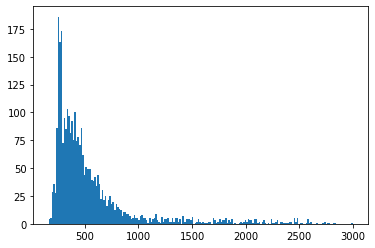

In [264]:
# 予測値をヒストグラムに描画

plt.hist(predicted_cross_df_cleaned["pred"], bins = 200)

(array([895., 510., 326., 181., 185.,  95.,  66.,  49.,  48.,  44.,  31.,
         33.,  25.,  16.,  19.,  14.,  10.,  13.,   8.,  14.,  11.,  20.,
         12.,  11.,  10.,  10.,   9.,   9.,   9.,  10.,  14.,  11.,   8.,
          8.,   8.,   3.,   6.,   8.,   6.,   6.,   5.,   4.,   7.,   6.,
          2.,   4.,   4.,   6.,   4.,   0.,   3.,   1.,   7.,   0.,   4.,
          3.,   4.,   4.,   0.,   4.,   2.,   1.,   0.,   2.,   3.,   1.,
          0.,   0.,   3.,   3.,   2.,   1.,   4.,   1.,   2.,   5.,   4.,
          2.,   3.,   2.,   2.,   6.,   3.,   5.,   2.,   1.,   5.,   4.,
          6.,   1.,   2.,   5.,   7.,   2.,   6.,   3.,   0.,   1.,   1.,
          0.,   1.,   0.,   1.,   1.,   4.,   3.,   2.,   0.,   1.,   2.,
          1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   2.,   1.,   0.,   0., 

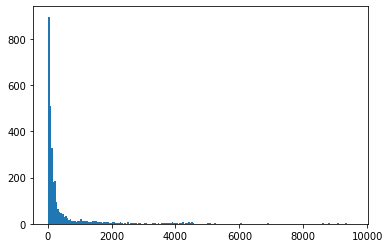

In [265]:
# 実際の視聴数をヒストグラムに描画

plt.hist(predicted_cross_df_cleaned["views"], bins = 200)

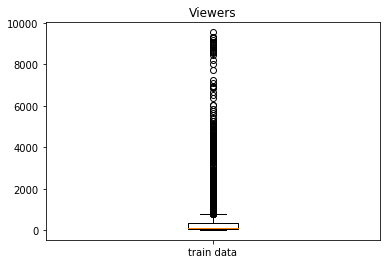

In [268]:
# 実際の視聴数の箱ひげ図を表示

fig1, ax1 = plt.subplots()
ax1.set_title('Viewers')
ax1.set_xticklabels(['train data'])
ax1.boxplot(predicted_cross_df_cleaned["views"])
plt.show()

これらの図から、実際の視聴数はかなり前半に寄っている事が分かる。

In [270]:
# 実際の視聴数の内訳

predicted_cross_df_cleaned["views"].describe()

count    3000.000000
mean      548.708333
std      1212.155134
min        20.000000
25%        58.000000
50%       128.000000
75%       348.000000
max      9545.000000
Name: views, dtype: float64

75%パーセンンタイルで348viewsなので、やはりかなり前半に寄っている。

# viewsの外れ値を除去する

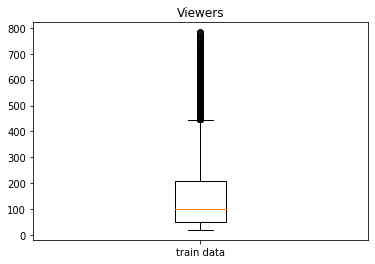

In [34]:
#外れ値を除去し、箱ひげ図に描画

fig1, ax1 = plt.subplots()
ax1.set_title('Viewers')
ax1.set_xticklabels(['train data'])

# 第1四分位値
Q1 = df_train["views"].quantile(0.25)
# 第3四分位値
Q3 = df_train["views"].quantile(0.75)
# 第1四分位値 と 第3四分位値 の範囲
IQR = Q3 - Q1
# 下限値として、Q1 から 1.5 * IQRを引いたもの 
LOWER_Q = Q1 - 1.5 * IQR
# 上限値として、Q3 に 1.5 * IQRをたしたもの 
HIGHER_Q = Q3 + 1.5 * IQR

# 四分位数の観点から、外れ値を除外する
train_views_iqr = df_train["views"][(LOWER_Q <= df_train["views"]) & (df_train["views"] <= HIGHER_Q)].dropna()

# 箱ひげ図を描画する
ax1.boxplot(train_views_iqr)

plt.show()

(array([1227.,  542.,  298.,  155.,   85.,   75.,   54.,   49.,   28.,
          25.]),
 array([ 20. ,  96.3, 172.6, 248.9, 325.2, 401.5, 477.8, 554.1, 630.4,
        706.7, 783. ]),
 <a list of 10 Patch objects>)

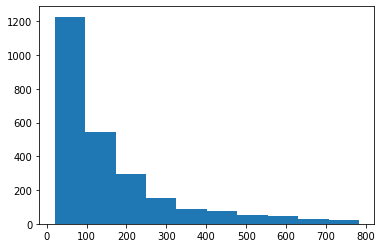

In [301]:
#ヒストグラム

plt.hist(train_views_iqr)

In [299]:
len(train_views_iqr)

2538

正規分布では無いが、大分初期よりも外れ値を除去出来た。

# 視聴数(views)と特徴量の相関を調べる(少ないviews)

上記外れ値を除去した状態で、viewsと特徴量の相関を調べる

In [62]:
train_views_iqr

0       290
2       329
3        63
4        37
5        65
       ... 
2995     20
2996    234
2997     97
2998     77
2999     59
Name: views, Length: 2538, dtype: int64

In [65]:
df_noouter = df_train.loc[(LOWER_Q <= df_train["views"]) & (df_train["views"] <= HIGHER_Q),:]
df_noouter

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
0,1,0,1,1.77778,86,3,1,0,0,290,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
2,3,0,1,1.76667,1163,2,1,0,0,329,...,-0.626436,-0.102908,0.576792,-0.805986,0.310637,0.422263,0.403496,0.264240,7.057590,-0.252417
3,4,0,1,1.77778,1326,2,1,0,0,63,...,-0.435836,0.052975,0.108777,-0.599593,0.408430,0.591615,0.415667,0.334706,7.025648,-0.309093
4,5,0,1,1.77273,2612,2,1,0,3,37,...,-1.714496,0.297421,-0.097744,0.000669,-1.639307,0.244313,0.099975,0.371806,-2.259024,-0.131085
5,6,0,1,1.77778,1073,2,1,0,0,65,...,1.592023,0.651160,0.400812,-0.594179,0.758877,1.842952,2.639154,-0.983139,0.803161,0.143301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,1,1.76667,138,2,0,0,0,20,...,0.190193,-0.755953,-0.231644,0.308153,-0.373529,0.876928,0.422415,0.074538,-3.646102,-0.302841
2996,2997,0,1,1.77778,113,2,0,0,0,234,...,-1.433418,1.234688,0.406196,0.877129,-1.218880,1.145661,-0.112073,0.230396,-3.713165,-0.525256
2997,2998,0,1,1.77778,30,2,0,0,0,97,...,-0.115696,-0.746977,0.685888,0.203295,-0.379776,0.512881,-0.275278,0.459139,2.927374,0.219621
2998,2999,0,1,1.77778,115,2,0,0,0,77,...,-1.174133,-1.123509,0.387533,-0.117955,1.226050,-1.122658,-0.056242,-0.078198,-4.572043,-0.803208


In [66]:
df_noouter_corr = df_noouter.drop("comp_id", axis = 1)
df_noouter_corr = df_noouter_corr.corr()

In [72]:
df_noouter_corr.loc[:,"views"].sort_values(ascending = False)

views         1.000000
n_likes       0.167933
ad_blocked    0.080606
image_3511    0.065149
image_1937    0.062217
                ...   
image_755    -0.063898
title_24     -0.065553
desc_28      -0.066153
title_37     -0.067755
desc_26      -0.068629
Name: views, Length: 4113, dtype: float64

In [67]:
#0.1以上の正の相関がある

df_noouter_corr.loc[:,"views"][0.1 <= df_noouter_corr.loc[:,"views"]]

n_likes    0.167933
views      1.000000
Name: views, dtype: float64

In [68]:
#-0.1以下の負の相関がある

df_noouter_corr.loc[:,"views"][df_noouter_corr.loc[:,"views"] <= -0.1]

Series([], Name: views, dtype: float64)

(array([  8.,  28., 117., 273., 515., 773., 867., 709., 465., 234.,  96.,
         21.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.06862938, -0.05794309, -0.0472568 , -0.0365705 , -0.02588421,
        -0.01519791, -0.00451162,  0.00617467,  0.01686097,  0.02754726,
         0.03823355,  0.04891985,  0.05960614,  0.07029244,  0.08097873,
         0.09166502,  0.10235132,  0.11303761,  0.12372391,  0.1344102 ,
         0.14509649,  0.15

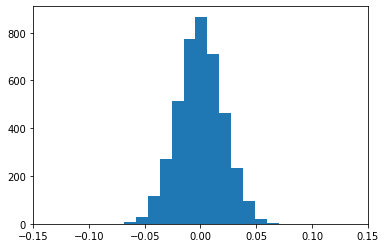

In [71]:
plt.xlim(-0.15, 0.15)
plt.hist(df_noouter_corr.loc[:,"views"], bins = 100)

こう見ると、viewsが少ないものに関しては各特徴量との相関も低く、視聴数を推測するのが難しいと言える。  
  
逆にviewsが多いものの方がある程度の相関があるのかも知れない。  
今回の目的も、「どの動画に広告費を投資するべきか」なので、より視聴数の伸びる動画を予測出来るようにすべき。

# 視聴数(views)と特徴量の相関を調べる(多いviews)

今回はあえて外れ値のみに注目してみる。

In [78]:
df_outer = df_train.loc[df_train["views"] >= HIGHER_Q,:]
df_outer

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
1,2,0,1,1.33333,1129,2,1,0,0,1443,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
6,7,0,1,1.77778,24,2,1,0,0,2233,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
9,10,0,1,1.77778,2501,2,1,0,0,1035,...,4.782446,2.090028,-1.397716,0.835906,-0.361374,1.560565,-1.733690,-0.890116,-0.963211,-0.405098
10,11,0,1,1.77778,142,5,0,0,0,1406,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
15,16,0,1,1.77778,48,2,0,0,1,1812,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,2983,0,1,1.77778,34,2,1,1,0,2742,...,0.109427,-1.389475,2.822030,0.869156,-0.459074,-1.228109,-1.646931,1.292726,2.501805,0.250546
2983,2984,0,1,1.77778,35,2,1,1,0,1765,...,1.405500,0.718030,-0.453718,-0.137999,-0.572040,0.758704,0.501916,0.521468,-3.124783,-0.188777
2985,2986,0,1,1.77778,38,2,1,1,2,1902,...,-0.544659,0.106645,-0.991784,0.699745,-1.061788,1.043323,0.914741,0.608250,-0.742017,0.416278
2989,2990,0,1,1.77778,1497,2,0,0,1,5559,...,5.508794,-0.032228,1.605837,-0.349741,-0.649535,4.711851,0.245955,-0.219911,0.548802,0.036102


In [79]:
df_outer_corr = df_outer.drop("comp_id", axis = 1)
df_outer_corr = df_outer_corr.corr()

In [80]:
df_outer_corr.loc[:,"views"].sort_values(ascending = False)

views         1.000000
n_likes       0.213603
image_1885    0.163699
image_630     0.156125
image_1507    0.143119
                ...   
title_32     -0.147071
image_1487   -0.160227
image_409    -0.162971
desc_24      -0.191123
embed              NaN
Name: views, Length: 4113, dtype: float64

(array([  1.,   0.,   2.,   2.,   7.,  12.,  28.,  34.,  64., 102., 163.,
        217., 263., 323., 375., 442., 428., 376., 331., 294., 222., 166.,
        112.,  60.,  45.,  18.,  14.,   6.,   1.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.91122851e-01, -1.79211622e-01, -1.67300394e-01, -1.55389165e-01,
        -1.43477937e-01, -1.31566708e-01, -1.19655480e-01, -1.07744251e-01,
        -9.58330225e-02, -8.39217940e-02, -7.20105655e-02, -6.00993370e-02,
        -4.81881085e-02, -3.62768800e-02, -2.43656515e-02, -1.24544230e-02,
        -5.431

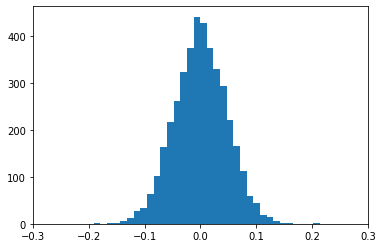

In [82]:
plt.xlim(-0.3, 0.3)
plt.hist(df_outer_corr.loc[:,"views"], bins = 100)

こちらの方が視聴数との相関係数が全体的に高くなった事が分かる。

相関係数が0.1以上もしくは-0.1以下の特徴量の数を調べる。

In [94]:
len(df_outer_corr.loc[df_outer_corr["views"] >= 0.1,:])

66

In [95]:
len(df_outer_corr.loc[df_outer_corr["views"] <= -0.1,:])

70

合わせて136個の特徴量になる。  
  
これにプラスして、カテゴリカル変数を追加したものを用いて再度機械学習にかけてみる。

# 視聴数の多いデータの特徴量を絞り、相関比の高いカテゴリカル変数を追加

まずは特徴量を絞る。

In [115]:
# viewsとの相関が0.1以上の特徴量もしくは-0.1以下の特徴量

df_outer_columns = df_outer_corr.loc[(df_outer_corr["views"] >= 0.1) | (df_outer_corr["views"] <= -0.1),:].index.drop("views")
df_outer_columns

Index(['n_likes', 'image_2', 'image_45', 'image_190', 'image_222', 'image_227',
       'image_293', 'image_334', 'image_347', 'image_357',
       ...
       'image_3942', 'image_3943', 'image_3944', 'title_9', 'title_29',
       'title_32', 'title_34', 'title_38', 'desc_24', 'desc_46'],
      dtype='object', length=135)

In [241]:
# 上記の特徴量のみを抽出(もとのtrainデータを用いる)

df_outer_lessfeatures = df_train.loc[:, df_outer_columns]
df_outer_lessfeatures

,n_likes,image_2,image_45,image_190,image_222,image_227,image_293,image_334,image_347,image_357,...,image_3942,image_3943,image_3944,title_9,title_29,title_32,title_34,title_38,desc_24,desc_46
0,0,0.036087,-0.010272,-0.907833,-0.421200,-0.884489,0.519313,-2.829860,0.252600,-0.016110,...,0.031430,-7.671426,4.883176,0.130342,0.186666,0.034073,-0.905057,0.698429,-6.461385,-0.021134
1,0,-0.015655,-0.688076,1.578833,0.752887,0.213020,0.600594,0.375721,-0.267552,-0.013059,...,0.273924,-2.278313,-0.468203,0.340133,-0.254688,-0.586383,0.491550,-0.176794,-6.461385,-0.021134
2,0,0.021490,-0.298926,-1.151479,0.019622,-1.321008,-0.069010,1.597641,-0.321097,0.007364,...,-0.569265,0.263273,0.881765,0.031226,0.130349,-0.073207,0.271520,-0.357736,3.057399,0.422263
3,0,0.012766,0.125642,-0.151420,0.401990,0.419844,-0.405861,1.099088,0.021937,0.030781,...,0.331786,0.385956,-0.200553,0.114066,-0.025482,-0.802950,0.380462,1.058688,3.070982,0.591615
4,3,0.000860,-0.128635,0.105056,0.206463,0.920431,0.205785,-0.098480,0.122562,-0.007860,...,-0.408619,-1.752024,0.095486,0.224235,-0.204253,-0.322400,0.118602,0.645116,2.843993,0.244313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,-0.039495,-0.077431,0.420444,-0.319724,-0.177930,0.123336,0.859879,-0.012621,-0.038581,...,0.135454,0.272280,-0.875581,-1.010125,-0.066862,-0.191482,-0.461681,0.109770,4.020459,0.876928
2996,0,-0.029679,-0.142303,-2.377238,-0.763685,-0.619714,0.188832,-3.997304,-0.135317,-0.001075,...,-0.632914,-4.520526,1.234319,0.296343,-1.122335,0.200423,0.597101,0.828619,3.085930,1.145661
2997,0,-0.044313,-1.025539,0.906518,0.935114,-0.550348,0.195344,0.026499,0.236848,0.005528,...,-0.731686,-0.667372,-0.863183,0.413459,-0.099620,-0.071100,0.133065,0.231280,3.104870,0.512881
2998,0,-0.022034,-0.064075,0.088196,-1.030123,-0.296461,-0.076164,-0.753217,-0.385627,0.024830,...,-0.450107,-3.665978,-0.916849,-0.207047,0.352449,0.317029,0.526414,-0.835274,3.419959,-1.122658


ここで、各カテゴリカル変数と特徴量との相関を知らべる。  

3種類以上を持つカテゴリカル変数と目的変数の相関比を求める。

In [196]:
# 相関比の関数

def correlation_ratio(cat_key, num_key, data):

    categorical=data[cat_key]
    numerical=data[num_key]

    mean=numerical.dropna().mean()
    all_var=((numerical-mean)**2).sum()  #全体の偏差の平方和

    unique_cat=pd.Series(categorical.unique())
    unique_cat=list(unique_cat.dropna())

    categorical_num=[numerical[categorical==cat] for cat in unique_cat]
    categorical_var=[len(x.dropna())*(x.dropna().mean()-mean)**2 for x in categorical_num]  
    #カテゴリ件数×（カテゴリの平均-全体の平均）^2

    r=sum(categorical_var)/all_var

    return r

In [200]:
print(correlation_ratio("hour", "views", df_outer))
print(correlation_ratio("dayofweek", "views", df_outer))
print(correlation_ratio("n_formats", "views", df_outer))
print(correlation_ratio("n_tags", "views", df_outer))
print(correlation_ratio("language", "views", df_outer))

0.05374192096978809
0.004373761224310578
0.010537292331822934
0.04903677932515332
0.022086441349703986


意外にもdayofweekとの相関は弱い。  
hourとn_tagsが比較的突出しているため、この二つを上記のデータに追加する。

In [242]:
df_outer_lessfeatures["hour"] = df_train["hour"]
df_outer_lessfeatures["tags"] = df_train["n_tags"]
df_outer_lessfeatures

,n_likes,image_2,image_45,image_190,image_222,image_227,image_293,image_334,image_347,image_357,...,image_3944,title_9,title_29,title_32,title_34,title_38,desc_24,desc_46,hour,tags
0,0,0.036087,-0.010272,-0.907833,-0.421200,-0.884489,0.519313,-2.829860,0.252600,-0.016110,...,4.883176,0.130342,0.186666,0.034073,-0.905057,0.698429,-6.461385,-0.021134,6,3
1,0,-0.015655,-0.688076,1.578833,0.752887,0.213020,0.600594,0.375721,-0.267552,-0.013059,...,-0.468203,0.340133,-0.254688,-0.586383,0.491550,-0.176794,-6.461385,-0.021134,6,0
2,0,0.021490,-0.298926,-1.151479,0.019622,-1.321008,-0.069010,1.597641,-0.321097,0.007364,...,0.881765,0.031226,0.130349,-0.073207,0.271520,-0.357736,3.057399,0.422263,6,0
3,0,0.012766,0.125642,-0.151420,0.401990,0.419844,-0.405861,1.099088,0.021937,0.030781,...,-0.200553,0.114066,-0.025482,-0.802950,0.380462,1.058688,3.070982,0.591615,6,0
4,3,0.000860,-0.128635,0.105056,0.206463,0.920431,0.205785,-0.098480,0.122562,-0.007860,...,0.095486,0.224235,-0.204253,-0.322400,0.118602,0.645116,2.843993,0.244313,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,-0.039495,-0.077431,0.420444,-0.319724,-0.177930,0.123336,0.859879,-0.012621,-0.038581,...,-0.875581,-1.010125,-0.066862,-0.191482,-0.461681,0.109770,4.020459,0.876928,4,8
2996,0,-0.029679,-0.142303,-2.377238,-0.763685,-0.619714,0.188832,-3.997304,-0.135317,-0.001075,...,1.234319,0.296343,-1.122335,0.200423,0.597101,0.828619,3.085930,1.145661,4,1
2997,0,-0.044313,-1.025539,0.906518,0.935114,-0.550348,0.195344,0.026499,0.236848,0.005528,...,-0.863183,0.413459,-0.099620,-0.071100,0.133065,0.231280,3.104870,0.512881,4,6
2998,0,-0.022034,-0.064075,0.088196,-1.030123,-0.296461,-0.076164,-0.753217,-0.385627,0.024830,...,-0.916849,-0.207047,0.352449,0.317029,0.526414,-0.835274,3.419959,-1.122658,3,5


# light gbmの交差検証にかける

In [243]:
predicted_outer_df = pd.DataFrame({'index':0, 'pred':0}, index=[1])
for train_index, val_index in kf.split(df_outer_lessfeatures.index):
    
    #訓練データindexと評価データindexを使って、訓練データと評価データ＆説明変数と目的変数に分割
    X_train_outer = df_outer_lessfeatures.iloc[train_index]
    y_train_outer = df_train["views"].iloc[train_index]
    X_test_outer = df_outer_lessfeatures.iloc[val_index]
    y_test_outer = df_train["views"].iloc[val_index]
    
    #LightGBM高速化の為のデータセットに加工する
    lgb_outer_train = lgb.Dataset(X_train_outer, y_train_outer)
    lgb_outer_eval = lgb.Dataset(X_test_outer, y_test_outer)
    
    #LightGBMのモデル構築
    gbm_outer = lgb.train(params,
                lgb_outer_train,
                valid_sets=(lgb_outer_train, lgb_outer_eval),
                num_boost_round=1000,
                early_stopping_rounds=100,
                verbose_eval=50)
    
    #モデルに評価用説明変数を入れて、予測値を出力する
    predicted_outer = gbm_outer.predict(X_test_outer)
    
    #temp_df : 予測値と正答値を照合するために、予測値と元のindexを結合
    temp_df = pd.DataFrame({'index':X_test_outer.index, 'pred':predicted_outer})
    
    #predicted_df : 空のデータフレームにtemp_dfを結合→二周目以降のループでは、predicted_df（中身アリ）にtemp_dfが結合する
    predicted_outer_df = pd.concat([predicted_outer_df, temp_df], axis=0)

Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 553.738	valid_1's rmse: 1160.21
[100]	training's rmse: 298.042	valid_1's rmse: 1158.57
[150]	training's rmse: 173.281	valid_1's rmse: 1148.37
[200]	training's rmse: 116.654	valid_1's rmse: 1148.81
Early stopping, best iteration is:
[149]	training's rmse: 175.191	valid_1's rmse: 1148.11
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 534.409	valid_1's rmse: 1008.11
[100]	training's rmse: 281.988	valid_1's rmse: 1016.24
Early stopping, best iteration is:
[17]	training's rmse: 889.542	valid_1's rmse: 985.431
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 569.004	valid_1's rmse: 1207.24
[100]	training's rmse: 304.202	valid_1's rmse: 1200.53
[150]	training's rmse: 177.318	valid_1's rmse: 1196.71
[200]	training's rmse: 120.829	valid_1's rmse: 1193.3
[250]	training's rmse: 90.9325	valid_1's rmse: 1191.6
[300]	training's rmse: 72.1105	vali

In [244]:
# 実際の視聴数と比べる

predicted_outer_df

,index,pred
1,0,0.000000
0,3,339.175597
1,4,1476.981085
2,6,680.807834
3,10,51.712845
...,...,...
595,2975,145.543808
596,2977,855.149106
597,2978,-32.918902
598,2980,987.814642


In [245]:
# 予測値を整理する

predicted_outer_df_cleaned = predicted_outer_df.sort_values("index").reset_index(drop = True).drop("index", axis = 1).drop(index = [0])
predicted_outer_df_cleaned

,pred
1,305.761674
2,663.890718
3,577.341100
4,339.175597
5,1476.981085
...,...
2996,566.753816
2997,787.431881
2998,0.409690
2999,1130.436637


In [246]:
# 予測値に目的変数を加える

predicted_outer_df_cleaned["views"] = df_train["views"].values
predicted_outer_df_cleaned

,pred,views
1,305.761674,290
2,663.890718,1443
3,577.341100,329
4,339.175597,63
5,1476.981085,37
...,...,...
2996,566.753816,20
2997,787.431881,234
2998,0.409690,97
2999,1130.436637,77


In [247]:
R2_X_outer = r2_score(predicted_outer_df_cleaned["views"], predicted_outer_df_cleaned["pred"])
RMSE_X_outer = np.sqrt(mean_squared_error(predicted_outer_df_cleaned["views"], predicted_outer_df_cleaned["pred"]))

print("交差検証結果のR2係数 :" + str(R2_X_outer))
print("交差検証結果のRMSE :" + str(RMSE_X_outer))

交差検証結果のR2係数 :0.17221165714744557
交差検証結果のRMSE :1102.669758881525


前回の交差検証結果のR2係数は約0.14、RMSEは約1125だったので、R2係数・RMSともに向上した。

結果を可視化してみる。

(array([1.405e+03, 5.070e+02, 2.800e+02, 1.150e+02, 9.200e+01, 6.400e+01,
        4.100e+01, 3.300e+01, 2.300e+01, 2.200e+01, 3.100e+01, 2.300e+01,
        2.000e+01, 1.800e+01, 1.900e+01, 2.500e+01, 1.600e+01, 1.100e+01,
        1.400e+01, 1.200e+01, 9.000e+00, 1.300e+01, 6.000e+00, 1.000e+01,
        4.000e+00, 4.000e+00, 7.000e+00, 7.000e+00, 8.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 6.000e+00, 3.000e+00,
        5.000e+00, 7.000e+00, 6.000e+00, 5.000e+00, 8.000e+00, 8.000e+00,
        3.000e+00, 9.000e+00, 7.000e+00, 7.000e+00, 9.000e+00, 9.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

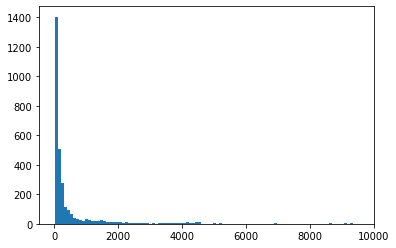

In [250]:
plt.hist(predicted_outer_df_cleaned["views"], bins = 100)

(array([  1.,   0.,   0.,   2.,   2.,   4.,   9.,  28.,  33.,  46.,  80.,
         76., 127., 113., 179., 331., 248., 227., 229., 172., 149., 111.,
        107.,  81.,  85.,  63.,  56.,  52.,  32.,  23.,  31.,  33.,  25.,
         21.,  13.,  15.,  10.,  12.,  16.,  14.,   4.,   9.,  16.,   7.,
         12.,   8.,  10.,   5.,   2.,  10.,   9.,   3.,   6.,   5.,   6.,
          5.,   2.,   1.,   5.,   2.,   3.,   2.,   2.,   1.,   2.,   0.,
          2.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([-5.47091308e+02, -4.92472945e+02, -4.37854583e+02, -3.83236221e+02,
        -3.28617858e+02, -2.73999496e+02, -2.19381134e+02, -1.64762771e+02,
        -1.10144409e+02, -5.55260468e+01, -9.07684438e-01,  5.37106779e+01,
         1.08329040e+02,  1.62947403e+02,  2.17565765e+02,  2.72184127e+02,
         3.268

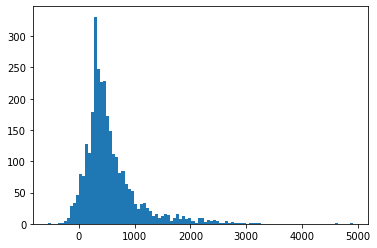

In [251]:
plt.hist(predicted_outer_df_cleaned["pred"], bins = 100)

# Submission Fileを作成する(2)

In [231]:
df_test

,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,n_formats,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
0,0,1,1.33333,1675,2,0,0,0,10,2,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
1,0,1,1.33333,1479,2,0,0,0,10,2,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
2,0,1,1.33333,1505,2,0,0,0,10,2,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
3,0,1,1.77778,50,2,1,1,1,6,5,...,0.246156,-1.001942,-1.502183,1.105716,-0.170937,0.181976,0.437707,0.058352,-2.209322,0.104916
4,0,1,1.33333,1543,2,0,0,0,6,2,...,-1.111625,0.252028,-0.193523,0.346493,-0.077318,0.276308,-0.045740,-0.007150,-3.448430,-0.031262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0,1,1.77778,46,3,1,1,0,2,4,...,-0.429883,2.516276,0.551086,-0.445840,-1.834950,-1.343484,1.518998,0.690137,2.181449,0.421095
982,0,1,1.33333,91,2,0,0,0,1,2,...,2.279406,1.579310,6.187336,-0.259915,2.230830,-3.986988,-0.375218,-0.185296,-3.666707,0.629068
983,0,1,1.77778,72,3,1,1,0,2,4,...,-0.852350,2.475394,0.530240,-0.414277,-1.807584,-1.542420,1.573145,0.537607,2.239486,0.168694
984,0,1,1.33333,82,7,0,0,0,9,3,...,-1.924031,-0.009321,1.078347,0.409481,1.172790,0.548644,-0.209369,-0.329074,0.300092,-0.437185


In [252]:
# 特徴量を合わせる

df_test_lessfeatures = df_test.loc[:, df_outer_columns]
df_test_lessfeatures

,n_likes,image_2,image_45,image_190,image_222,image_227,image_293,image_334,image_347,image_357,...,image_3942,image_3943,image_3944,title_9,title_29,title_32,title_34,title_38,desc_24,desc_46
0,0,0.007964,0.022086,1.138684,0.732992,0.341722,0.326041,-2.001826,-0.041135,0.002396,...,0.398974,-0.587512,0.307075,-0.048370,-0.119066,0.031131,0.077895,-0.606510,3.336861,0.276308
1,0,-0.019362,0.461555,-0.228736,-1.424320,0.975659,-0.189208,1.365799,0.089771,0.000355,...,0.460007,1.695584,-1.999666,-0.383055,-0.082863,0.216949,-0.052433,-0.662840,3.336861,0.276308
2,0,0.027754,-0.269136,-1.445790,0.092820,-0.268465,-0.079124,-0.642009,0.317970,-0.028164,...,0.437075,0.651618,-1.288662,-0.032752,-0.181495,0.277788,-0.069594,-0.419862,3.336861,0.276308
3,1,0.002011,-0.232376,-0.061959,1.127928,0.081044,0.152278,0.619018,0.216832,0.006393,...,0.082608,0.337596,0.454881,-0.371494,0.006548,0.590459,0.078996,1.481048,3.781933,0.181976
4,0,-0.060301,-0.153133,-0.116794,0.741302,-0.007941,0.012455,0.241592,-0.085400,-0.000566,...,0.755729,-3.424086,2.092235,0.245418,0.023039,-0.401776,0.030306,-0.258121,3.336861,0.276308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0,0.062704,0.114773,0.358948,-0.401203,0.123278,-0.528751,-0.396813,-0.108494,-0.051950,...,-0.435176,-0.081963,-0.059995,-0.074187,0.738447,-0.009815,-0.092402,-0.155833,3.273886,-1.343484
982,0,-0.011131,-0.486541,0.101351,-0.048138,-0.492847,-0.291100,1.141578,0.116401,-0.000845,...,-0.483335,4.703820,-0.777522,-0.586593,0.440108,0.714864,-0.309401,-1.066189,3.998603,-3.986988
983,0,0.103353,0.469767,0.347507,0.204311,-0.264219,-0.020964,-0.369319,0.255841,-0.009297,...,-0.239205,0.034206,0.945890,-0.117175,0.585788,-0.285448,-0.156330,-0.366336,3.592213,-1.542420
984,0,-0.011438,-0.266697,0.012354,-0.494616,0.520845,0.298036,-1.705812,0.214211,0.010293,...,-0.160389,0.722122,-1.482778,0.157749,-0.446167,-0.418317,-0.714460,-0.279011,5.858496,0.548644


In [253]:
df_test_lessfeatures["hour"] = df_test["hour"]
df_test_lessfeatures["n_tags"] = df_test["n_tags"]
df_test_lessfeatures

,n_likes,image_2,image_45,image_190,image_222,image_227,image_293,image_334,image_347,image_357,...,image_3944,title_9,title_29,title_32,title_34,title_38,desc_24,desc_46,hour,n_tags
0,0,0.007964,0.022086,1.138684,0.732992,0.341722,0.326041,-2.001826,-0.041135,0.002396,...,0.307075,-0.048370,-0.119066,0.031131,0.077895,-0.606510,3.336861,0.276308,3,10
1,0,-0.019362,0.461555,-0.228736,-1.424320,0.975659,-0.189208,1.365799,0.089771,0.000355,...,-1.999666,-0.383055,-0.082863,0.216949,-0.052433,-0.662840,3.336861,0.276308,3,10
2,0,0.027754,-0.269136,-1.445790,0.092820,-0.268465,-0.079124,-0.642009,0.317970,-0.028164,...,-1.288662,-0.032752,-0.181495,0.277788,-0.069594,-0.419862,3.336861,0.276308,3,10
3,1,0.002011,-0.232376,-0.061959,1.127928,0.081044,0.152278,0.619018,0.216832,0.006393,...,0.454881,-0.371494,0.006548,0.590459,0.078996,1.481048,3.781933,0.181976,3,6
4,0,-0.060301,-0.153133,-0.116794,0.741302,-0.007941,0.012455,0.241592,-0.085400,-0.000566,...,2.092235,0.245418,0.023039,-0.401776,0.030306,-0.258121,3.336861,0.276308,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0,0.062704,0.114773,0.358948,-0.401203,0.123278,-0.528751,-0.396813,-0.108494,-0.051950,...,-0.059995,-0.074187,0.738447,-0.009815,-0.092402,-0.155833,3.273886,-1.343484,13,2
982,0,-0.011131,-0.486541,0.101351,-0.048138,-0.492847,-0.291100,1.141578,0.116401,-0.000845,...,-0.777522,-0.586593,0.440108,0.714864,-0.309401,-1.066189,3.998603,-3.986988,13,1
983,0,0.103353,0.469767,0.347507,0.204311,-0.264219,-0.020964,-0.369319,0.255841,-0.009297,...,0.945890,-0.117175,0.585788,-0.285448,-0.156330,-0.366336,3.592213,-1.542420,13,2
984,0,-0.011438,-0.266697,0.012354,-0.494616,0.520845,0.298036,-1.705812,0.214211,0.010293,...,-1.482778,0.157749,-0.446167,-0.418317,-0.714460,-0.279011,5.858496,0.548644,13,9


In [254]:
# Public dataを、上記のモデルで交差検証する

outer_submit_df = pd.DataFrame({'index':0, 'pred':0}, index=[1])
for train_index, val_index in kf.split(df_test_outer.index):
    X_outer_submit = df_test_outer.iloc[val_index]
    
    outer_submit = gbm_outer.predict(X_outer_submit)

    temp_df = pd.DataFrame({'index':X_outer_submit.index, 'pred':outer_submit})

    outer_submit_df = pd.concat([outer_submit_df, temp_df], axis=0)

In [255]:
outer_submit_cleaned = outer_submit_df.sort_values("index").reset_index(drop = True).drop("index", axis = 1).drop(index = [0])
outer_submit_cleaned

,pred
1,523.673379
2,-60.967474
3,447.545186
4,969.175025
5,284.269335
...,...
982,215.183809
983,272.678022
984,-52.428446
985,688.490526


In [256]:
#提出ファイルの作成

submission_outer = solution_format.copy()
submission_outer["views"] =  outer_submit_cleaned["pred"].values
submission_outer

,comp_id,views
0,3001,523.673379
1,3002,-60.967474
2,3003,447.545186
3,3004,969.175025
4,3005,284.269335
...,...,...
981,3982,215.183809
982,3983,272.678022
983,3984,-52.428446
984,3985,688.490526


In [257]:
submission_outer.to_csv("submission_12.2.2021.csv", index = False)